In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [2]:
# In[EXEMPLO 1]:
#############################################################################
#                          REGRESSÃO LINEAR SIMPLES                         #
#                  EXEMPLO 1 - CARREGAMENTO DA BASE DE DADOS                #
#############################################################################

df_tempodist = pd.read_csv('data/tempodist.csv', delimiter=',')
df_tempodist

# Características das variáveis do dataset
df_tempodist.info()

# Estatísticas univariadas
df_tempodist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

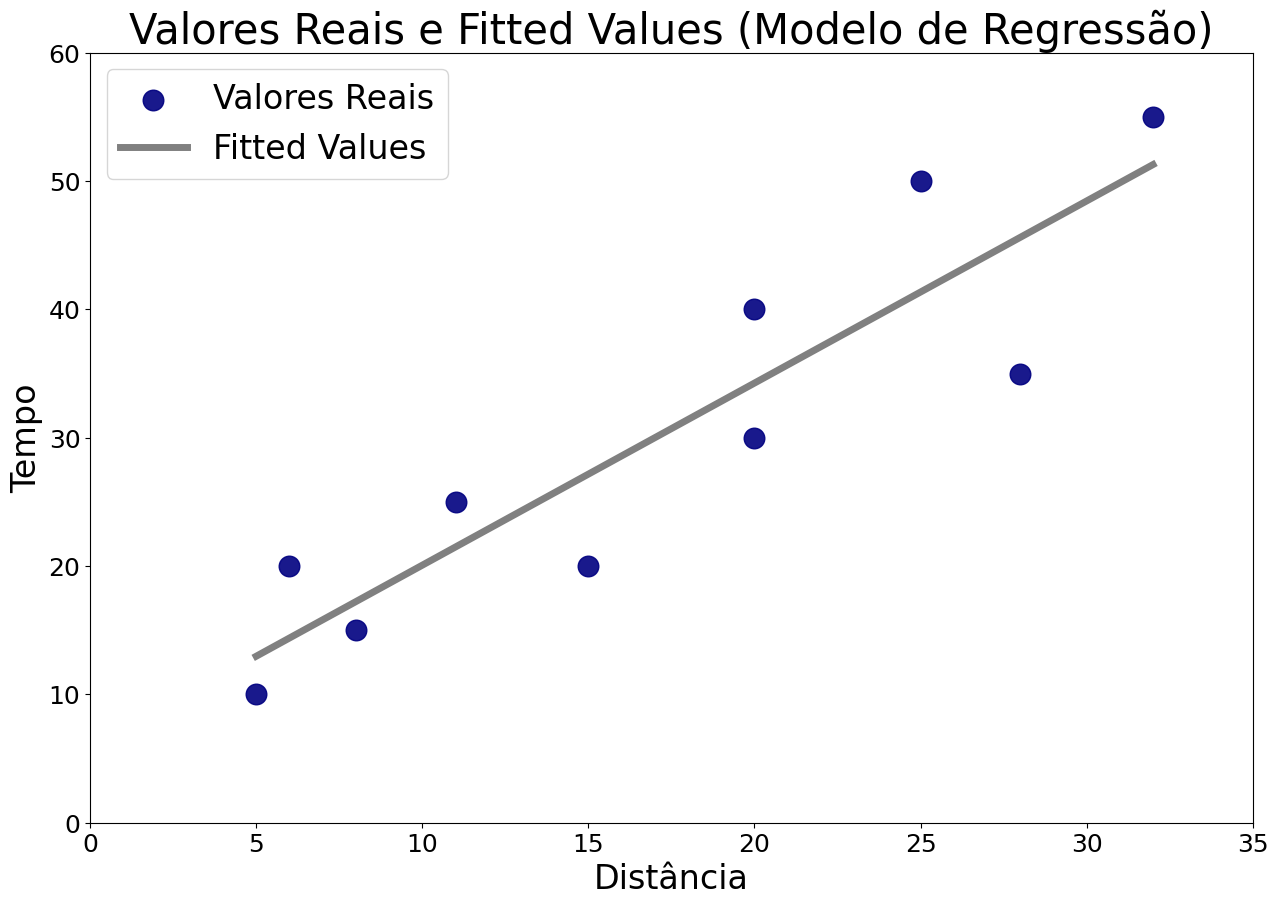

In [3]:
# In[1.1]: Gráfico de dispersão com o ajuste linear (fitted values de um modelode regressão) 
# que se adequa às observações: função 'regplot' do pacote 'seaborn'

plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24, loc='upper left')
plt.show

In [4]:
# In[1.2]: Gráfico de dispersão interativo (figura 'EXEMPLO1.html' salva na
#pasta do curso)

# Dados do gráfico
x = df_tempodist['distancia']
y = df_tempodist['tempo']

# Definição da regressão linear
slope, intercept = np.polyfit(x, y, 1)
y_trend = slope * x + intercept

fig = go.Figure()

# Inserção dos pontos (valores reais)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color='navy', size=20), name='Valores Reais')
    )

# Inserção da reta (fitted values)
fig.add_trace(go.Scatter(
    x=x,
    y=y_trend,
    mode='lines',
    line=dict(color='dimgray', width=5), name='Fitted Values')
    )

# Configurações de layout
fig.update_layout(
    xaxis_title='Distância',
    yaxis_title='Tempo',
    title={
        'text': 'Gráfico de Dispersão com Fitted Values',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.97,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='snow',
    xaxis=dict(gridcolor='black'),
    yaxis=dict(gridcolor='black'),
    showlegend=True
)

fig.write_html('EXEMPLO1.html')

# Abrir o arquivo HTML no navegador
import webbrowser
webbrowser.open('EXEMPLO1.html')

True

In [5]:
# In[1.3]: Estimação do modelo de regressão linear simples

# Estimação do modelo
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

# Observação dos parâmetros resultantes da estimação
modelo.summary()

c:\Users\guilh\OneDrive\MBA\Machine Learning\Supervisionado\Regressão Linear\regressao_linear\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000314
Time:                        05:59:08   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

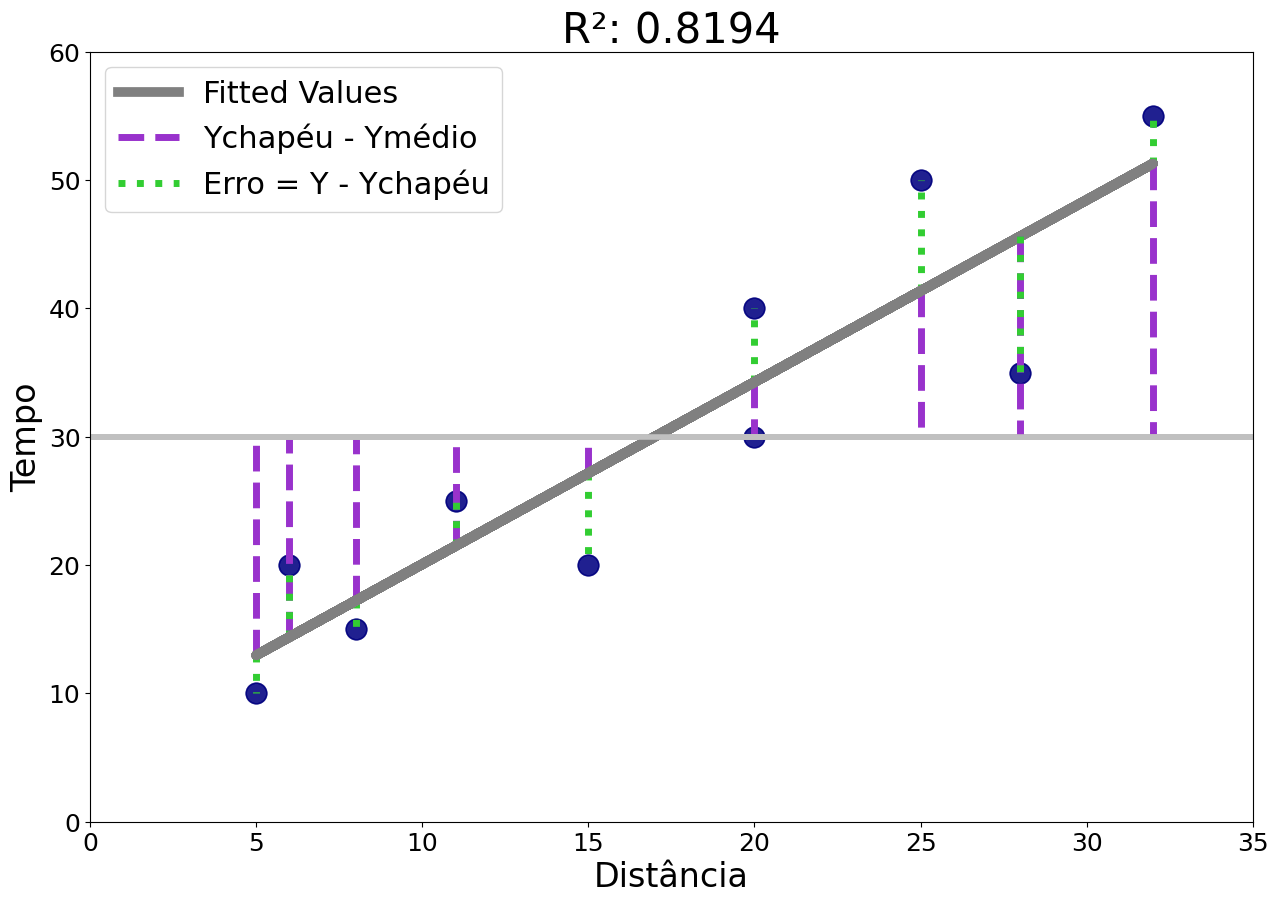

In [6]:
# In[1.4]: Salvando fitted values (variável yhat) e residuals (variável erro)
#no dataset

df_tempodist['yhat'] = modelo.fittedvalues
df_tempodist['erro'] = modelo.resid
df_tempodist

# In[1.5]: Gráfico didático para visualizar o conceito de R²

plt.figure(figsize=(15,10))
y = df_tempodist['tempo']
yhat = df_tempodist['yhat']
x = df_tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot(x, yhat, color='grey', linewidth=7)
    plt.plot([x[i], x[i]], [yhat[i], mean[i]], '--', color='darkorchid', linewidth=5)
    plt.plot([x[i], x[i]], [yhat[i], y[i]],':', color='limegreen', linewidth=5)
    plt.scatter(x, y, color='navy', s=220, alpha=0.2)
    plt.axhline(y = y.mean(), color = 'silver', linestyle = '-', linewidth=4)
    plt.title('R²: ' + str(round(modelo.rsquared, 4)), fontsize=30)
    plt.xlabel('Distância', fontsize=24)
    plt.ylabel('Tempo', fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0, 35)
    plt.ylim(0, 60)
    plt.legend(['Fitted Values', 'Ychapéu - Ymédio', 'Erro = Y - Ychapéu'],
               fontsize=22, loc='upper left')
plt.show()

In [7]:
# In[1.6]: Cálculo manual do R²

R2 = ((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()/(((df_tempodist['yhat']-
                                        df_tempodist['tempo'].mean())**2).sum()+
                                        (df_tempodist['erro']**2).sum())

round(R2,4)

np.float64(0.8194)

In [8]:
# In[1.7]: Coeficiente de ajuste (R²) é a correlação ao quadrado

# Correlação de Pearson
df_tempodist[['tempo','distancia']].corr()

# R²
(df_tempodist[['tempo','distancia']].corr())**2

# R² de maneira direta
modelo.rsquared

np.float64(0.8194256756756757)

c:\Users\guilh\OneDrive\MBA\Machine Learning\Supervisionado\Regressão Linear\regressao_linear\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<function matplotlib.pyplot.show(close=None, block=None)>

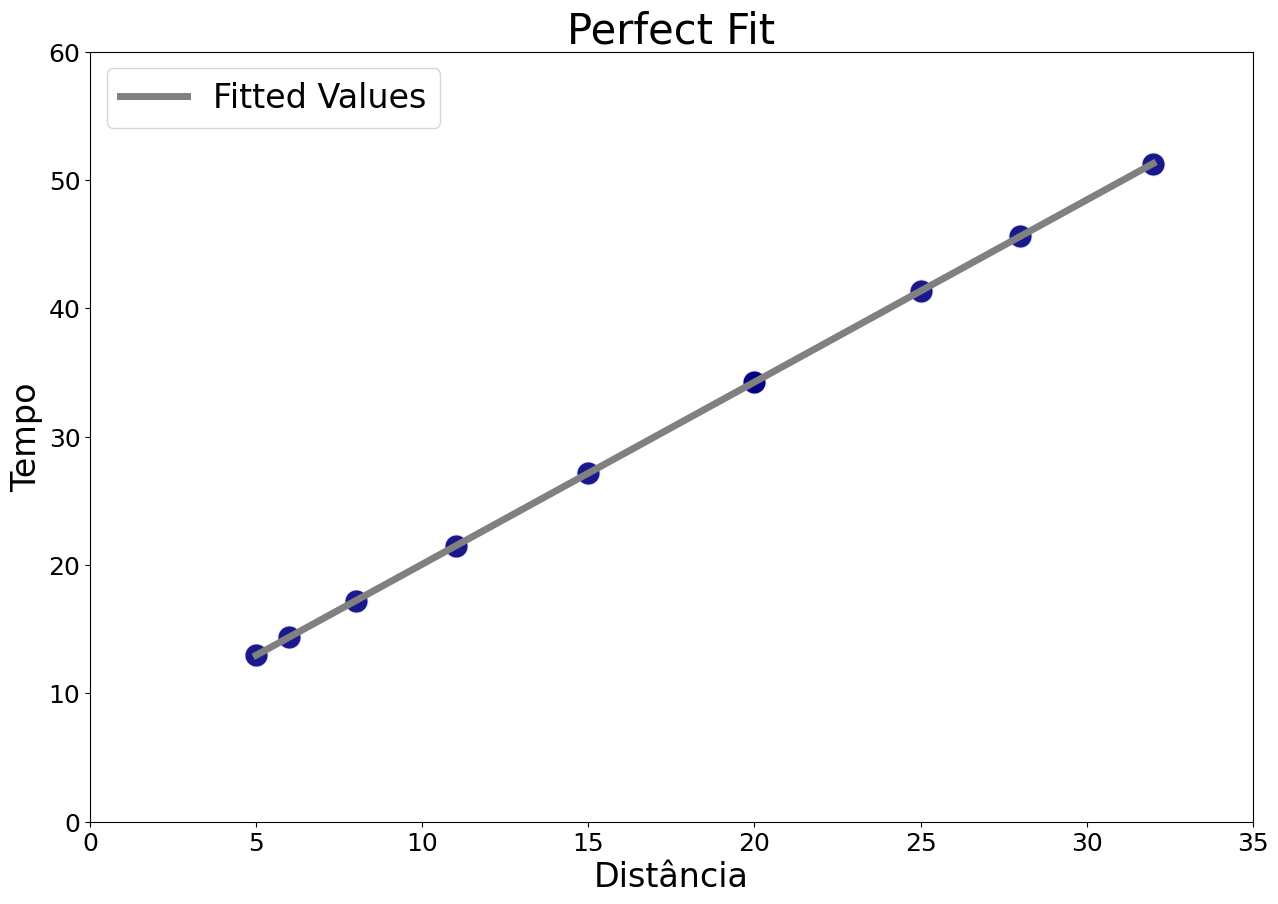

In [9]:
# In[1.8]: Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos)

# Estimação do modelo com yhat como variável dependente resultará em um modelo
#com R² igual a 100%
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()

# Parâmetros resultantes da estimação deste modelo didático
modelo_auxiliar.summary()

# In[1.9]:Gráfico mostrando o perfect fit

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=300)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Perfect Fit', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=24)
plt.show

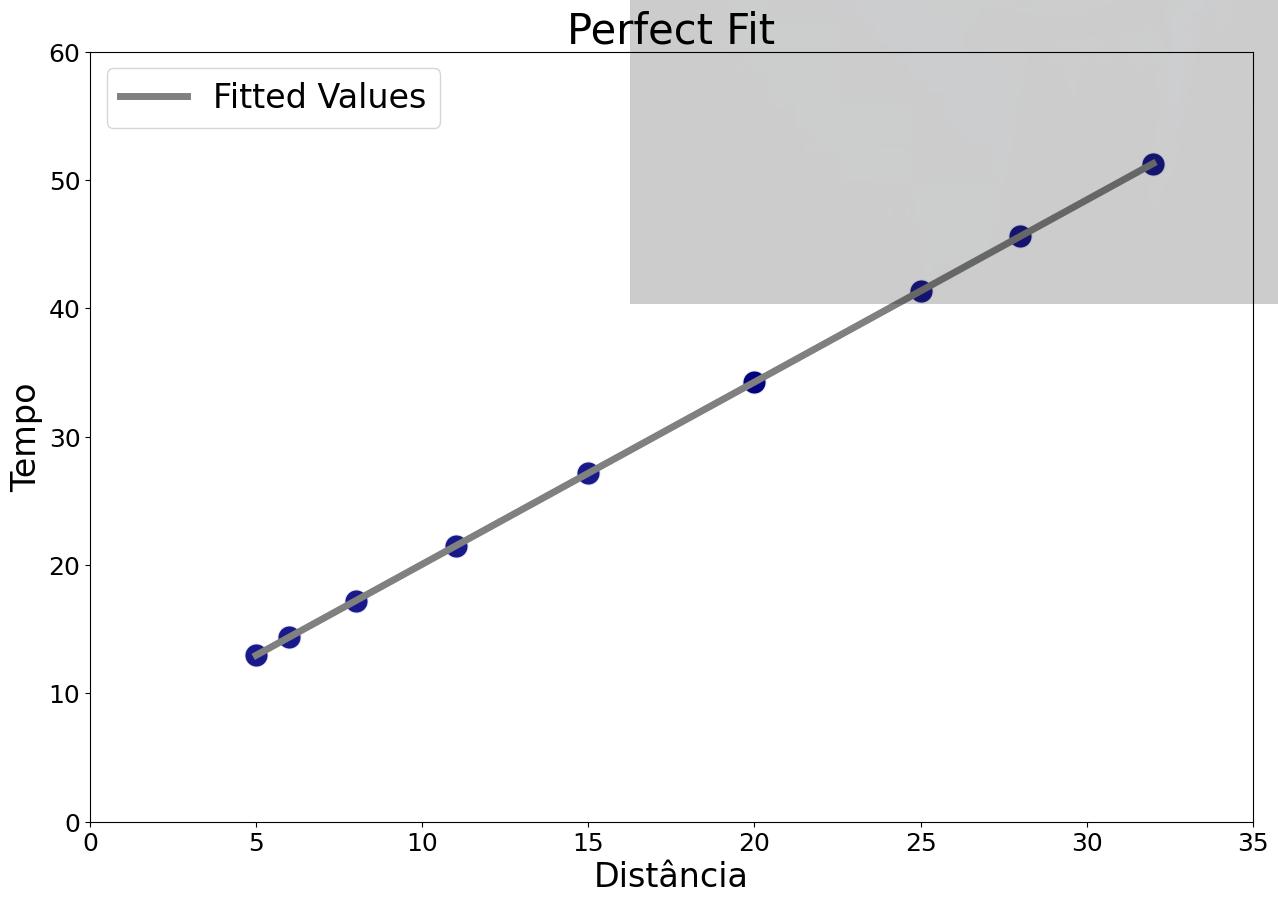

In [12]:
# In[1.10]:Gráfico mostrando o perfect fit com figura .JPG e som .MP3

import urllib.request
from PIL import Image
from io import BytesIO

# Define a URL da imagem (FONTE: Divulgação/Warner Bros. Pictures)
url = "https://cinebuzz.uol.com.br/media/uploads/harry_potter_3_WumwIEd.jpg"

# Define os cabeçalhos da solicitação
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Cria uma solicitação com os cabeçalhos
request = urllib.request.Request(url, headers=headers)

# Abre a URL e lê os dados da imagem
response = urllib.request.urlopen(request)
image_data = response.read()

# Carrega a imagem em um objeto PIL (Python Imaging Library)
imagem = Image.open(BytesIO(image_data))

# Define as dimensões e a posição desejada da imagem
nova_largura = 8400  # Largura da imagem redimensionada
nova_altura = 5430  # Altura da imagem redimensionada
posicao_x = 630  # Posição horizontal da imagem
posicao_y = 600  # Posição vertical da imagem

# Redimensiona a imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Cria o gráfico por meio da função 'regplot' do pacote 'seaborn'
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=300)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Perfect Fit', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=24)
plt.show

# Adiciona a imagem redimensionada em uma posição específica do gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1, alpha=0.20)

# Exibe o gráfico com a imagem
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

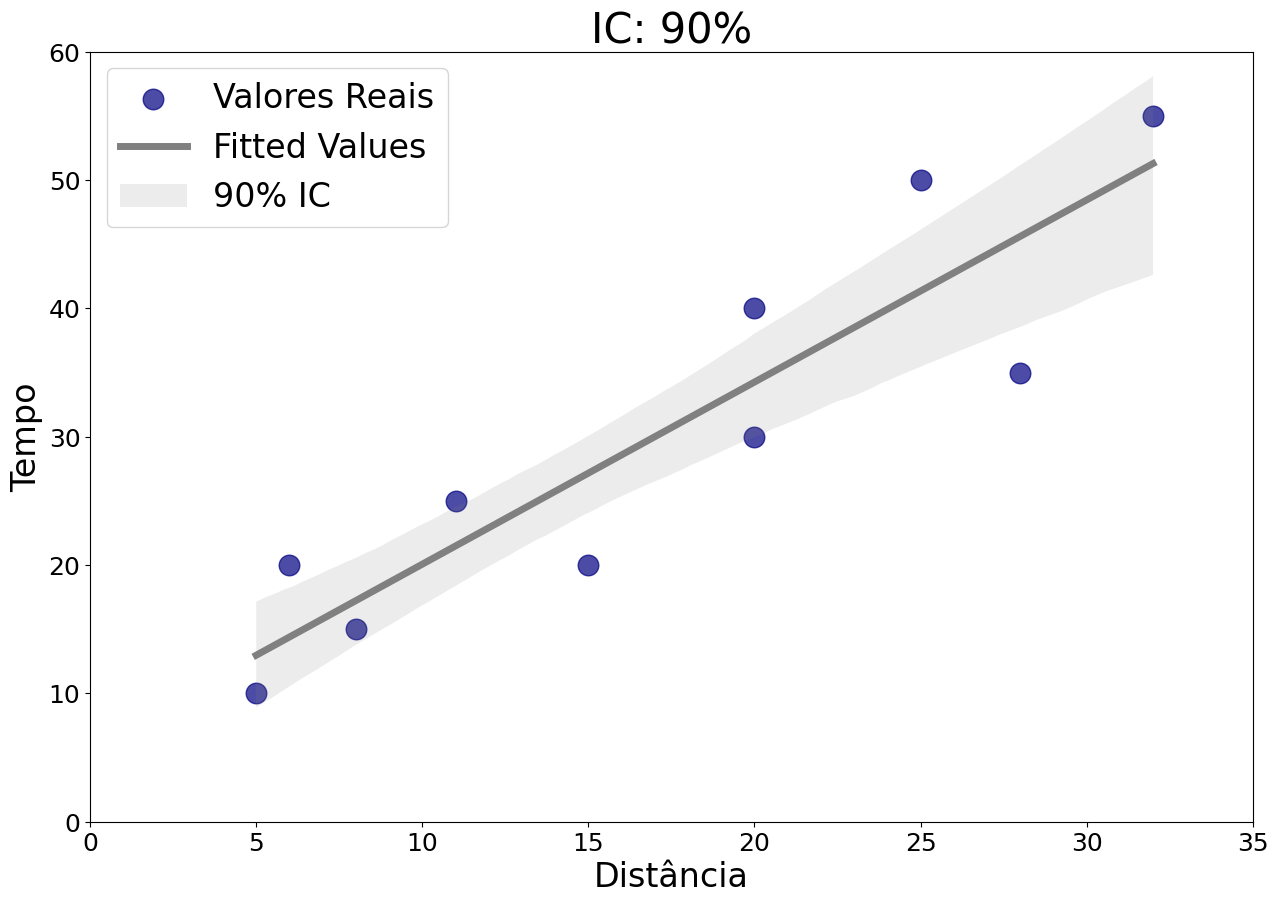

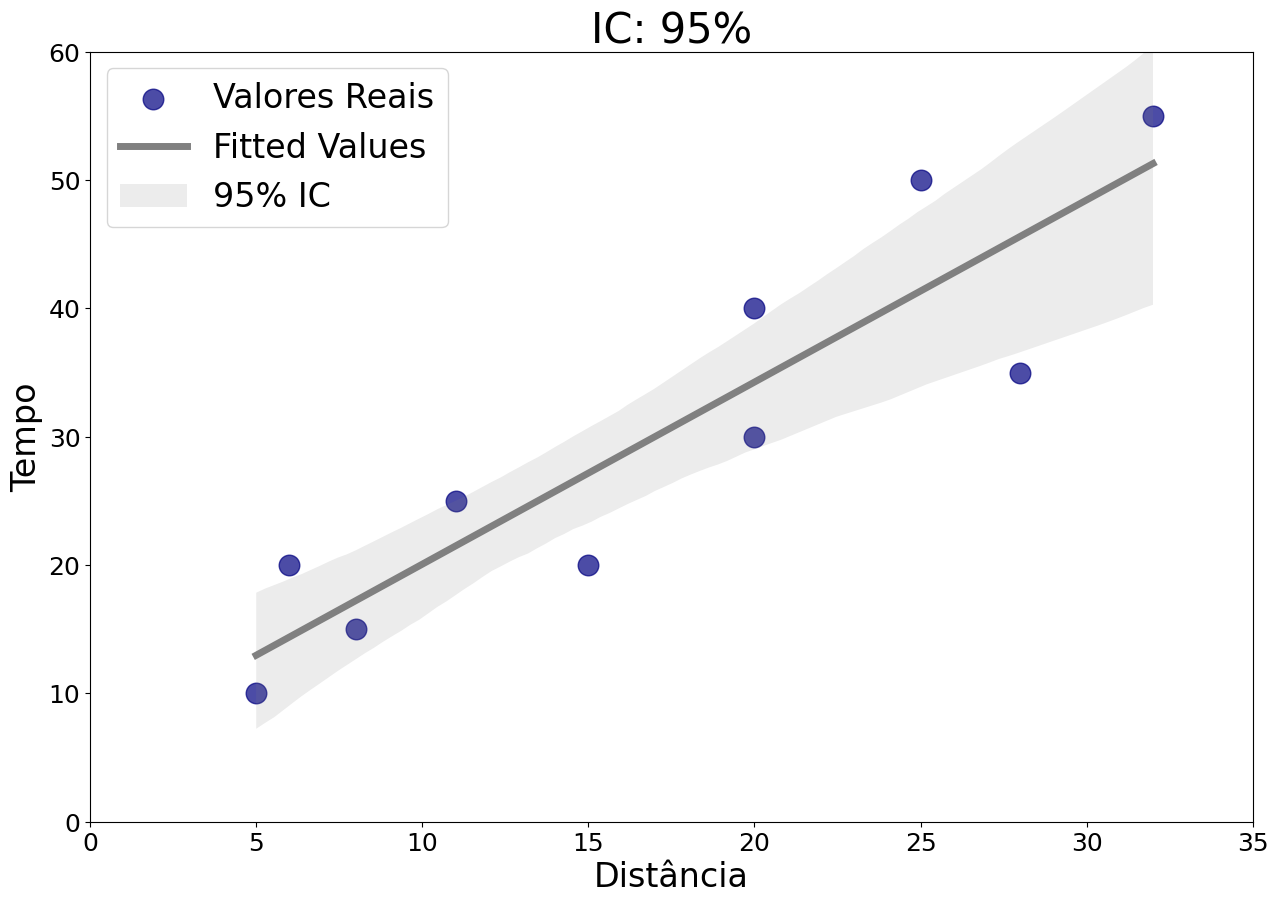

In [11]:
# In[1.11]: Voltando ao nosso modelo original

# Gráfico com intervalo de confiança de 90%

plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=90,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 90%', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '90% IC'],
           fontsize=24, loc='upper left')
plt.show

# In[1.12]: Gráfico com intervalo de confiança de 95%

plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 95%', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'],
           fontsize=24, loc='upper left')
plt.show